In [336]:
import pandas as pd
import altair as alt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, binom, poisson, gaussian_kde, gamma, weibull_min, lognorm

### Data Processing and Analysis

##### Data Transformations

In [223]:
data = pd.read_csv('Customer Churn.csv')

# changing status column from 1: Active, 2: In-Active to 0 and 1
data['Status'] = data['Status'] - 1

# changing Tariff Plan from 1: Pay as You Go, 2: Contractual to 0 and 1
data['Tariff Plan'] = data['Tariff Plan'] - 1

# changing Status column name to Inactivity to represent 0: False (active) and 1: True (inactive)
# changing Tariff Plan column name to Pay On Contract to represent 0: False (pay-as-you-go), 1: True (Contractual)
# Renaming other columns to make them consistent - removing 2 space between words, upper casing subsequent words
data.rename(columns={'Tariff Plan':'Pay On Contract','Status': 'Inactivity', 'Call  Failure':'Call Failure', 
                     'Subscription  Length':'Subscription Length', 
                     'Charge  Amount':'Charge Amount', 'Frequency of use':'Frequency of Use'}, inplace=True)

# Caluclating the call failure rate and adding it as a column 
data['Call Failure Rate'] = data['Call Failure'] / data['Frequency of Use']
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of Use,Frequency of SMS,Distinct Called Numbers,Age Group,Pay On Contract,Inactivity,Age,Customer Value,Churn,Call Failure Rate
0,8,0,38,0,4370,71,5,17,3,0,0,30,197.640,0,0.112676
1,0,0,39,0,318,5,7,4,2,0,1,25,46.035,0,0.000000
2,10,0,37,0,2453,60,359,24,3,0,0,30,1536.520,0,0.166667
3,10,0,38,0,4198,66,1,35,1,0,0,15,240.020,0,0.151515
4,3,0,38,0,2393,58,2,33,1,0,0,15,145.805,0,0.051724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,1,0,25,721.980,0,0.142857
3146,17,0,17,1,9237,177,80,42,5,0,0,55,261.210,0,0.096045
3147,13,0,18,4,3157,51,38,21,3,0,0,30,280.320,0,0.254902
3148,7,0,11,2,4695,46,222,12,3,0,0,30,1077.640,0,0.152174


##### Null Values

In [362]:
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of Use,Frequency of SMS,Distinct Called Numbers,Age Group,Pay On Contract,Inactivity,Age,Customer Value,Churn,Call Failure Rate
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,0.077778,0.248254,30.998413,470.972916,0.157143,0.144741
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993,0.166627
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,0.000000,0.000000,25.000000,113.801250,0.000000,0.039830
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,0.000000,0.000000,30.000000,228.480000,0.000000,0.110883
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,0.000000,0.000000,30.000000,788.388750,0.000000,0.188179
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,1.000000,1.000000,55.000000,2165.280000,1.000000,3.500000


In [224]:
print(data.info())

data['Call Failure Rate'].isnull().sum()
data[data.isnull().any(axis=1)]
data[(data['Call Failure'] == 0) & (data['Frequency of Use']==0)] # look at rows for Call Failure is NaN
data[data['Call Failure Rate']==0] # Compare it to rows where Call Failure rate is actually 0
# Don't want to remove the rows where Call Failure is NaN because there could be some analysis done on this set it to the mean of the column

mean_cfr = data['Call Failure Rate'].mean()
data['Call Failure Rate'] = data['Call Failure Rate'].fillna(value=mean_cfr)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of Use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Pay On Contract          3150 non-null   int64  
 10  Inactivity               3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
 14  Call Failure Rate       

##### Outliers

In [65]:
graph = []
for i in data.columns:
    chart = alt.Chart(data).mark_boxplot().encode(
        x=alt.X(f'{i}'), 
    )
    graph.append(chart)

alt.vconcat(*graph)

alt.VConcatChart(...)

##### Balance of Churn

In [72]:
chart = alt.Chart(data).mark_bar().encode(
    x=alt.X('Churn'),
    y=alt.Y('count()'))

chart

alt.Chart(...)

##### Predictor/Feature Distributions

In [225]:
data.columns

Index(['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of Use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Pay On Contract', 'Inactivity',
       'Age', 'Customer Value', 'Churn', 'Call Failure Rate'],
      dtype='object')

In [227]:
kde = gaussian_kde(data['Call Failure'])
kde

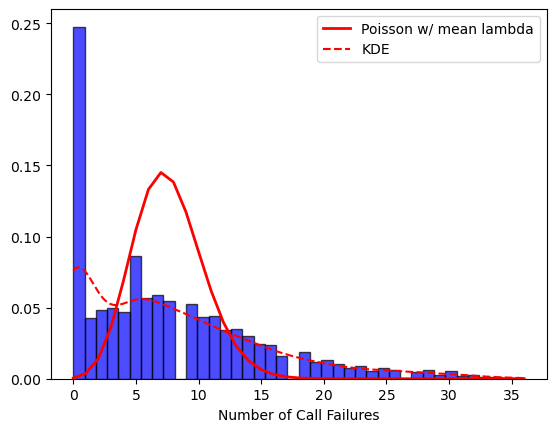

In [246]:
# Number of call failures - Poisson
plt.hist(data['Call Failure'], bins=40, density=True, alpha=0.7, color='blue', edgecolor='black')

kde = gaussian_kde(data['Call Failure'])
x = np.linspace(data['Call Failure'].min(), data['Call Failure'].max(), 1000)
density_kde = kde(x)

lambda_estimate = data['Call Failure'].mean()
max_call_failures = data['Call Failure'].max()
x_p = np.arange(0, max_call_failures+1)
poisson_dist = poisson.pmf(x_p, lambda_estimate)

plt.plot(x_p, poisson_dist, 'r', linewidth=2, label='Poisson w/ mean lambda')
plt.plot(x, density_kde, label='KDE', color='r', linestyle='--')
plt.xlabel('Number of Call Failures')
plt.legend()
plt.show()

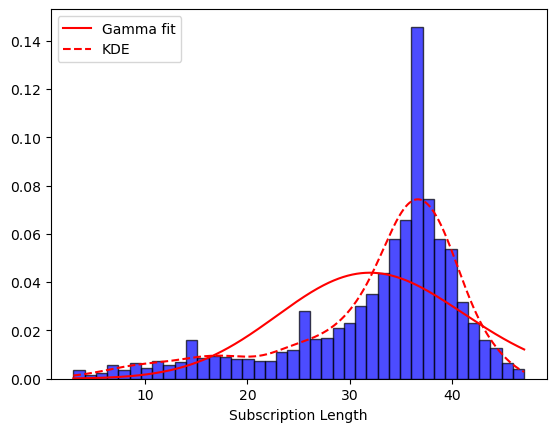

In [259]:
# Number of months for a subscription - should be something else...not poisson 
# because this isn't over some time interval unlike call failures which is # of call failuers over the 9-month period
# maybe Gamma works - time until they leave/subscription ends
plt.hist(data['Subscription Length'], bins=40, density=True, alpha=0.7, color='blue', edgecolor='black')

a, loc, scale = gamma.fit(data['Subscription Length'])

x_f = np.linspace(data['Subscription Length'].min(), data['Subscription Length'].max(), 1000)
fitted_pdf = gamma.pdf(x, a, loc, scale)

kde = gaussian_kde(data['Subscription Length'])
x = np.linspace(data['Subscription Length'].min(), data['Subscription Length'].max(), 1000)
density_kde = kde(x)

plt.plot(x_f, fitted_pdf, 'r', label='Gamma fit')
plt.plot(x, density_kde, label='KDE', color='r', linestyle='--')
plt.xlabel('Subscription Length')
plt.legend()
plt.show()

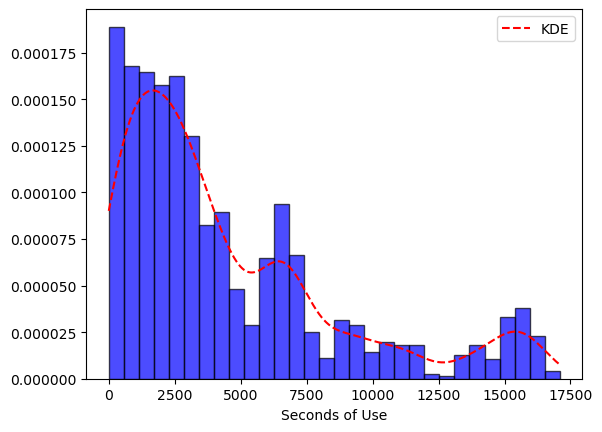

In [280]:
# Time of Use
plt.hist(data['Seconds of Use'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# c, loc, scale = weibull_min.fit(data['Seconds of Use'])

# x_f = np.linspace(data['Seconds of Use'].min(), data['Seconds of Use'].max(), 1000)
# fitted_pdf = gamma.pdf(x, a, loc, scale)

kde = gaussian_kde(data['Seconds of Use'])
x = np.linspace(data['Seconds of Use'].min(), data['Seconds of Use'].max(), 1000)
density_kde = kde(x)

# fitted_weibull = weibull_min.pdf(x, c, loc, scale)

#plt.plot(x_f, fitted_pdf, 'r', label='Gamma fit')
plt.plot(x, density_kde, label='KDE', color='r', linestyle='--')
plt.xlabel('Seconds of Use')
plt.legend()
plt.show()

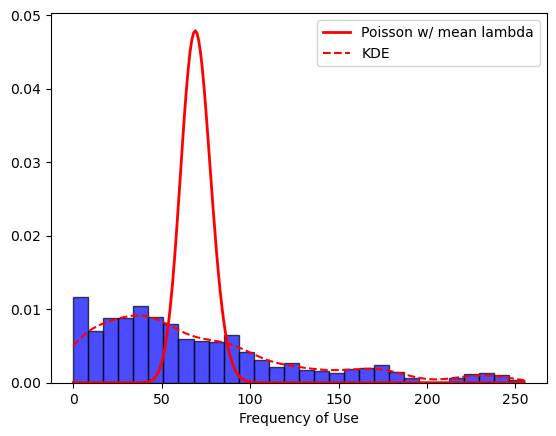

In [299]:
# Number of Calls - Poisson
plt.hist(data['Frequency of Use'], bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

kde = gaussian_kde(data['Frequency of Use'])
x = np.linspace(data['Frequency of Use'].min(), data['Frequency of Use'].max(), 1000)
density_kde = kde(x)

lambda_estimate = data['Frequency of Use'].mean()
max = data['Frequency of Use'].max()
x_p = np.arange(0, max+1)
poisson_dist = poisson.pmf(x_p, lambda_estimate)

plt.plot(x_p, poisson_dist, 'r', linewidth=2, label='Poisson w/ mean lambda')
plt.plot(x, density_kde, label='KDE', color='r', linestyle='--')
plt.xlabel('Frequency of Use')
plt.legend()
plt.show()

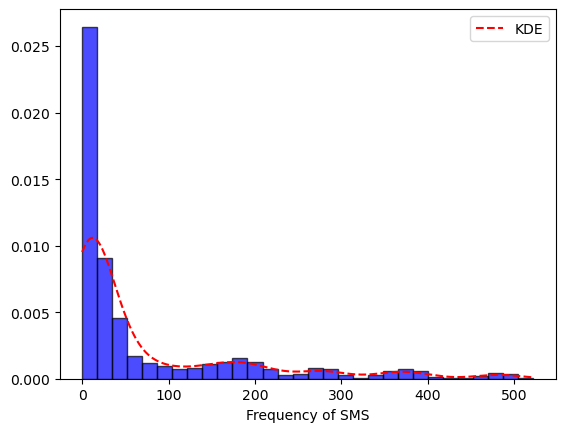

In [319]:
# Number of SMS - Poisson
plt.hist(data['Frequency of SMS'], bins=30, alpha=0.7, density=True, color='blue', edgecolor='black')

kde = gaussian_kde(data['Frequency of SMS'])
x = np.linspace(data['Frequency of SMS'].min(), data['Frequency of SMS'].max(), 1000)
density_kde = kde(x)

plt.plot(x, density_kde, label='KDE', color='r', linestyle='--')
plt.xlabel('Frequency of SMS')
plt.legend()
plt.show()

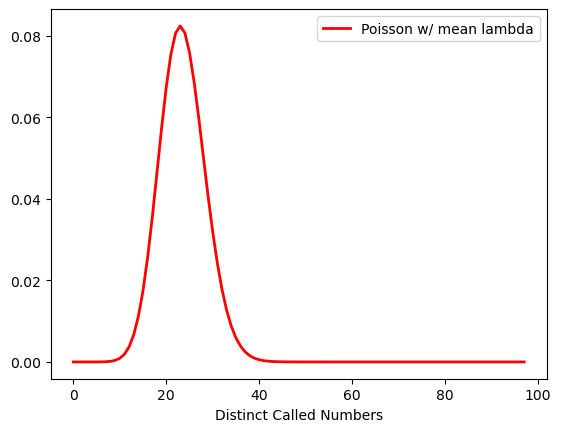

In [330]:
lambda_estimate = data['Distinct Called Numbers'].mean()
max = data['Distinct Called Numbers'].max()
x_p = np.arange(0, max+1)
poisson_dist = poisson.pmf(x_p, lambda_estimate)

plt.plot(x_p, poisson_dist, 'r', linewidth=2, label='Poisson w/ mean lambda')
plt.xlabel('Distinct Called Numbers')
plt.legend()
plt.show()

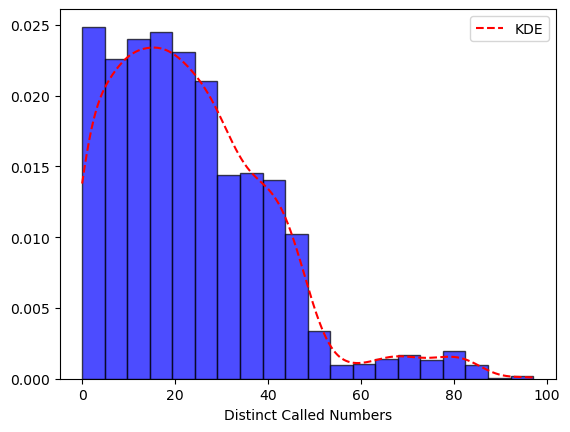

In [332]:
# Number of unique #'s called - Poisson -> super bad fit
plt.hist(data['Distinct Called Numbers'], bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')

kde = gaussian_kde(data['Distinct Called Numbers'])
x = np.linspace(data['Distinct Called Numbers'].min(), data['Distinct Called Numbers'].max(), 1000)
density_kde = kde(x)

plt.plot(x, density_kde, label='KDE', color='r', linestyle='--')
plt.xlabel('Distinct Called Numbers')
plt.legend()
plt.show()

plt.show()

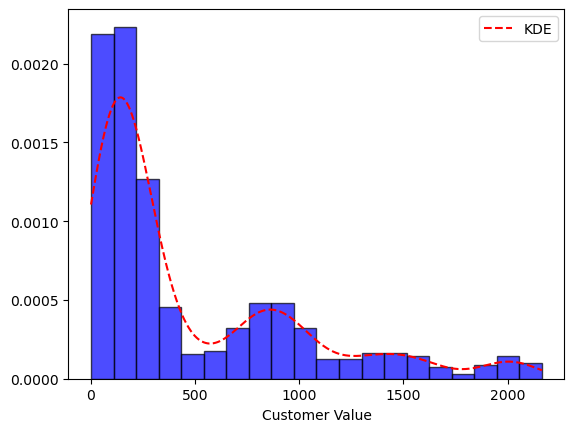

In [358]:
# total customer value - lognormal or exponential maybe
plt.hist(data['Customer Value'], bins=20, alpha=0.7, density=True, color='blue', edgecolor='black')


kde = gaussian_kde(data['Customer Value'])
x = np.linspace(data['Customer Value'].min(), data['Customer Value'].max(), 1000)
density_kde = kde(x)

plt.plot(x, density_kde, label='KDE', color='r', linestyle='--')
plt.xlabel('Customer Value')
plt.legend()
plt.show()

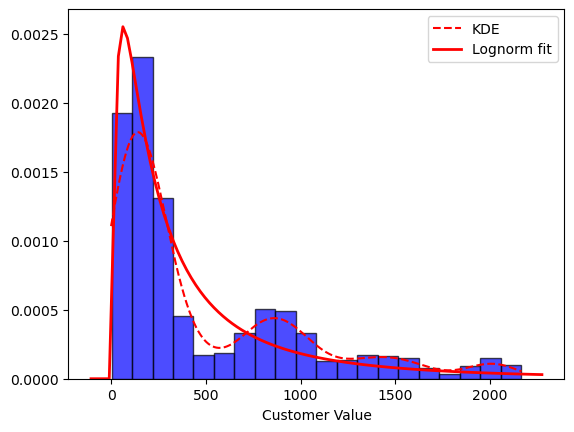

In [349]:
# total customer value - lognormal or exponential maybe
plt.hist(data[data['Customer Value']>0]['Customer Value'], bins=20, alpha=0.7, density=True, color='blue', edgecolor='black')

fit = lognorm.fit(data[data['Customer Value']>0]['Customer Value'], floc=0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
lognorm_pdf = lognorm.pdf(x, *fit)

kde = gaussian_kde(data['Customer Value'])
x_kde = np.linspace(data['Customer Value'].min(), data['Customer Value'].max(), 1000)
density_kde = kde(x_kde)

plt.plot(x_kde, density_kde, label='KDE', color='r', linestyle='--')

plt.plot(x, lognorm_pdf, 'r', linewidth=2, label='Lognorm fit')
plt.legend()
plt.xlabel('Customer Value')
plt.show()

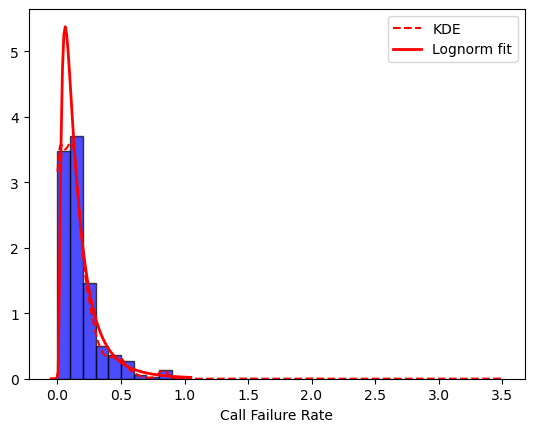

In [357]:
# call failure rate - lognormal or exponential
plt.hist(data[data['Call Failure Rate'] > 0]['Call Failure Rate'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], density=True, alpha=0.7, 
         color='blue', edgecolor='black')

fit = lognorm.fit(data[data['Call Failure Rate']>0]['Call Failure Rate'], floc=0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
lognorm_pdf = lognorm.pdf(x, *fit)

kde = gaussian_kde(data['Call Failure Rate'])
x_kde = np.linspace(data['Call Failure Rate'].min(), data['Call Failure Rate'].max(), 1000)
density_kde = kde(x_kde)

plt.plot(x_kde, density_kde, label='KDE', color='r', linestyle='--')
plt.plot(x, lognorm_pdf, 'r', linewidth=2, label='Lognorm fit')
plt.legend()
plt.xlabel('Call Failure Rate')
plt.show()

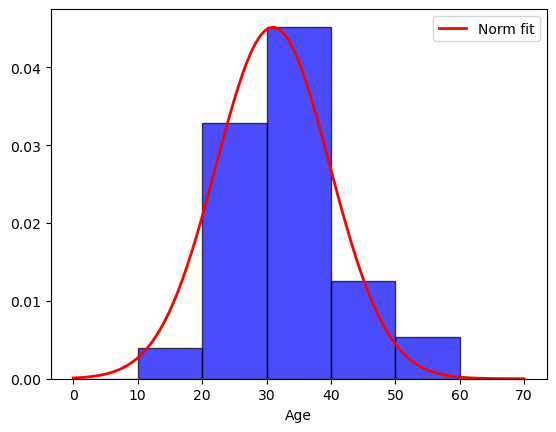

In [361]:
norm_fit = norm.fit(data['Age'])
x = np.linspace(0, 70, 100)
norm_pdf = norm.pdf(x, *norm_fit)

plt.hist(data['Age'], bins=[0,10,20,30,40,50,60,70], density=True, alpha=0.7, color='blue', edgecolor='black')
# Adding labels and title
plt.xlabel('Age')
plt.plot(x, norm_pdf, 'r', linewidth=2, label='Norm fit')

# Display the plot
plt.legend()
plt.show()

To Do:
1. Summary Statistics of each column **(done)**
2. outliers / null / empty **(done)**
3. balance of churn **(done)**
4. Graphs of data (distribution of each column and then fit something) **(done)**

Initial analysis
6. PCA / Heirachal clustering
7. lasso/ridge in the classification to see which predictors are important

Classification
1. random forest
2. boosted model

Regression
1. logistic regression